# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [18]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head()

Attrition  Age  DistanceFromHome  EmployeeNumber  Gender  JobSatisfaction  \
0          0   27                 2            1898  Female                3   
1          0   27                 9            1965    Male                4   
2          0   44                 2            1703  Female                4   
3          0   42                 2            1231    Male                1   
4          0   32                 1            2016  Female                4   

  MaritalStatus  MonthlyIncome OverTime  PercentSalaryHike  TotalWorkingYears  
0        Single           6500       No                 14                  9  
1        Single           4105       No                 14                  7  
2       Married           7879      Yes                 19                  9  
3       Married           6272       No                 16                 10  
4       Married          10422       No                 19                 14

> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [19]:
target = 'Attrition'

## (1) Gender --> Attrition

In [20]:
feature = 'Gender'

* 교차표

In [21]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender     Female  Male
Attrition              
0             157   248
1              66   129

In [22]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender       Female      Male
Attrition                    
0          0.704036  0.657825
1          0.295964  0.342175

* 시각화

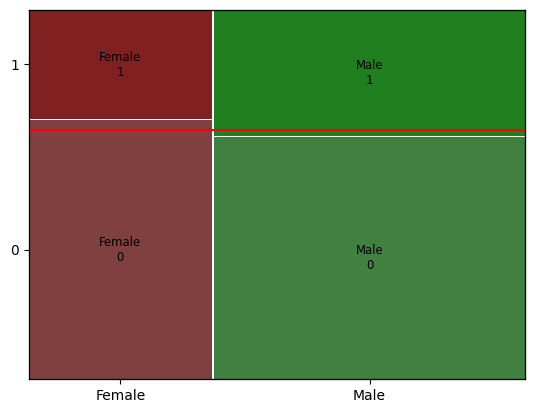

In [23]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [24]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1


* 파악된 내용을 기술해 봅시다.

In [25]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

## (2) JobSatisfaction --> Attrition

In [26]:
feature = 'JobSatisfaction'

* 교차표

In [27]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47

In [28]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

JobSatisfaction         1         2        3         4
Attrition                                             
0                0.587302  0.681034  0.65896  0.745946
1                0.412698  0.318966  0.34104  0.254054

* 시각화

In [29]:
data[target].mean()

0.325

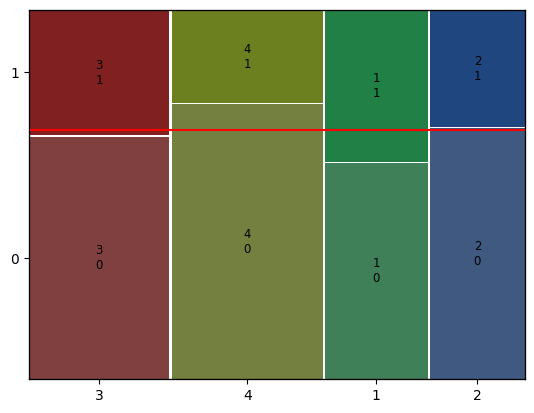

In [30]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [31]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
# print('기대빈도\n',result[3])

교차표
 JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.884191097554549
p-value 0.03087092125625072


* 파악된 내용을 기술해 봅시다.

In [32]:
# 그래프, 가설검정 결과 약간 관련이 있다.

## (3) MaritalStatus --> Attrition

In [33]:
feature = 'MaritalStatus'

* 교차표

In [34]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103

In [35]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.794643  0.748175  0.518692
1              0.205357  0.251825  0.481308

* 시각화

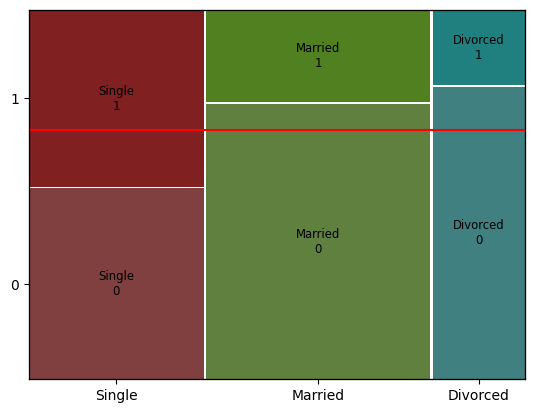

In [36]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [37]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 37.829711907070525
p-value 6.100738829354226e-09
기대빈도
 [[ 75.6  184.95 144.45]
 [ 36.4   89.05  69.55]]


* 파악된 내용을 기술해 봅시다.

In [38]:
# 관련이 깊다.

## (4) OverTime --> Attrition

In [39]:
feature = 'OverTime'

* 교차표

In [40]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

OverTime    No  Yes
Attrition          
0          315   90
1           90  105

In [41]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

OverTime         No       Yes
Attrition                    
0          0.777778  0.461538
1          0.222222  0.538462

* 시각화

In [42]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [43]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          315   90
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 58.57149427899665
p-value 1.9603625783060702e-14
기대빈도
 [[273.375 131.625]
 [131.625  63.375]]


* 파악된 내용을 기술해 봅시다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [44]:
feature = 'Age'

In [45]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

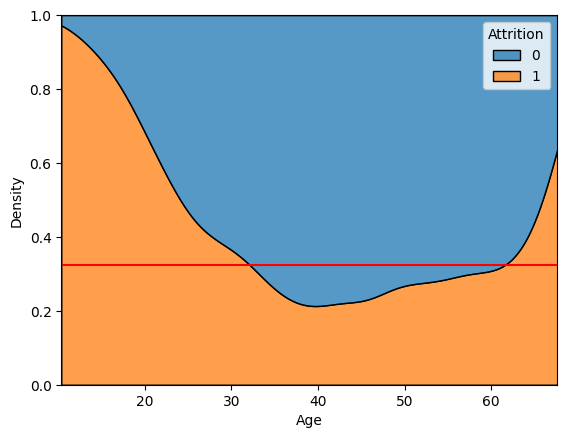

In [46]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (2) DistanceFromHome --> Attrition

In [47]:
feature = 'DistanceFromHome'

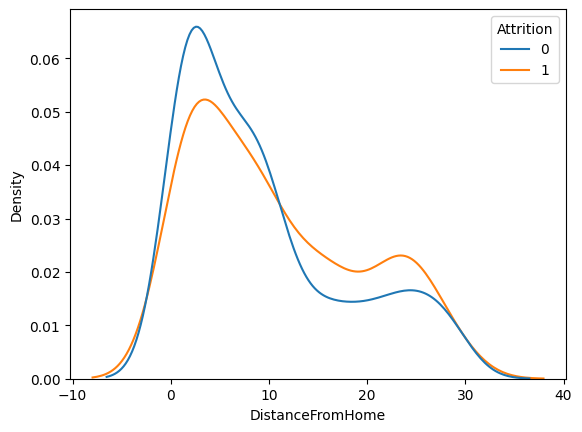

In [48]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

In [49]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (3) MonthlyIncome --> Attrition

In [50]:
feature = 'MonthlyIncome'

In [51]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

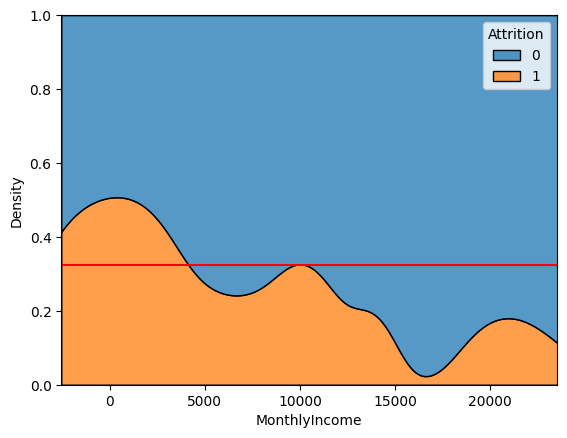

In [52]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (4) PercentSalaryHike --> Attrition

In [53]:
feature = 'PercentSalaryHike'

In [54]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

In [55]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (5) TotalWorkingYears --> Attrition

In [56]:
feature = 'TotalWorkingYears'

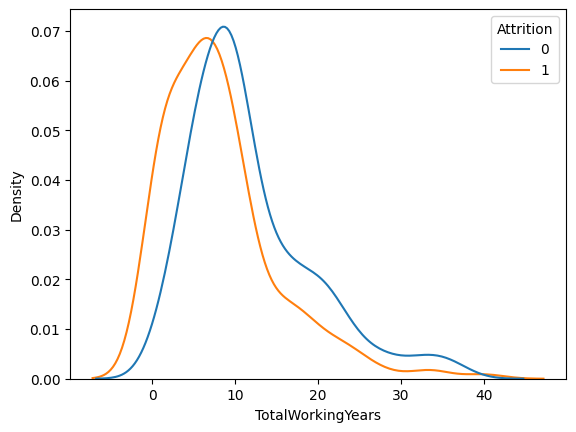

In [57]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

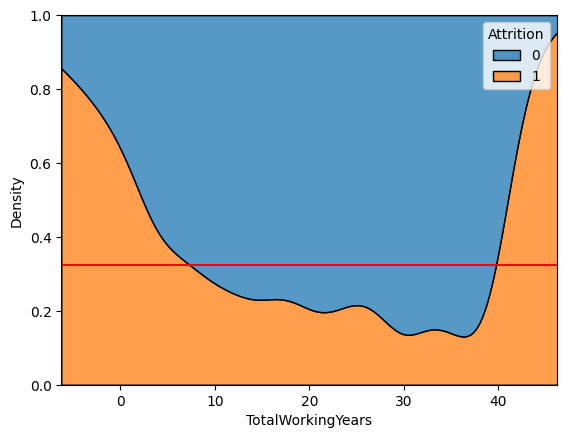

In [58]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

# 4.관계 정리하기

① 강한관계

In [59]:
# MaritalStatus, OverTime

② 중간관계

In [60]:
# Age, DFH, MI

③ 관계없음(약한 관계)

In [61]:
# Gender, JS, PSH, TWY